<a href="https://colab.research.google.com/github/fares-mldev/uns-pdi2021/blob/main/tp1/PDI_TP_1_Image_manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PDI TP 1 - Image manipulation

La actividad consiste en:
* Métodos para abrir una imagen de un archivo y disponer la información en una componente imagen. (tamaño, canales, formato, etc)
* Métodos para guardar la información de una componente imagen a un archivo.
* Métodos para acceder a una componente imagen y leer o modificar su contenido.
* Métodos para graficar o modificar una componente imagen.

Observaciones: se busca que desarrollen un código que permita abrir una imagen, conocer las características de esta, luego modificarla mediante alguna alteración en los canales RGB, graficarla y luego guardar el resultado como una imagen nueva.

Se requiere: 
* [Numpy](https://numpy.org/) (Libreria numérica)
* [Imageio](https://imageio.readthedocs.io/en/stable/index.html) (Libreria para acceder a la imagen como matriz)
* [Matplotlib](https://matplotlib.org) (libreria para graficar)
* Presentación Interactiva

#Module installation and imports

In [90]:
# Import numpy
import numpy as np

# Import imageio
import imageio as iio

# Import matplotlib
import matplotlib.pyplot as plt

# Get images

In [74]:
# Images URL list 
url_dict = {}
url_dict["Tree"] = "https://freepreset.net/wp-content/uploads/2019/04/_982_Low-Contrast-Photography-and-How-to-Correct-it-in-Post-Processing.jpg"
url_dict["Baboon"] = "https://i0.wp.com/www.dfstudios.co.uk/wp-content/uploads/2014/02/mandrill_condec.jpg"
url_dict["Lena"] = "https://i2.wp.com/www.dfstudios.co.uk/wp-content/uploads/2014/02/lena_condec.jpg"
url_dict["Pine"] = "https://images.unsplash.com/photo-1518405688853-3c6ab0d4e3c7?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1500&q=80"

def get_image(image: str) -> np.array:
    '''
    Downloads specified image from the web and returns it as a numpy array
    '''
    # Read image from file
    img = iio.imread(url_dict[image])

    # Return image
    return np.asarray(img)

#Image properties
Prints image properties (shape, data type, number of pixels, max-min values)

In [67]:
def describe_img(img: np.array):
  '''
  Prints image properties
  '''
  print("Image shape (height,width,channels):", img.shape)
  print("Element type:", img.dtype)
  print("Total number of pixels:",img.size)
  print("Pixels per channel:", int(img.size/img.shape[2]))
  print("min-max value of blue channel:",img[:,:,0].min(),img[:,:,0].max())
  print("min-max value of green channel:",img[:,:,1].min(),img[:,:,1].max())
  print("min-max value of red channel:",img[:,:,2].min(),img[:,:,2].max())

#Plot image
Plot image using matplotlib

In [68]:
def plot_img(img: np.array):
  '''
  Plots image using matplotlib 
  '''
  plt.imshow(img)
  

#Plot channels
Plots image channels in separate figures

In [83]:
def plot_channels(img: np.array):
  '''
  Plots image channels in separate figures 
  '''
  # Set figure properties
  fig, axes = plt.subplots(1, 3)
  fig.set_size_inches(20, 3)

  # Channels
  channels = ["r", "g", "b"]

  # Plot channel histogram
  for idx, channel in enumerate(channels):
    
    # Empty image
    img_channel = np.zeros(img.shape, dtype=np.uint8)
    
    # Copy channel
    img_channel[:,:,idx] = img[:,:,idx]
    
    # Plot channel
    axes[idx].imshow(img_channel)
  

#Histogram visualization
Plots histogram for each channel

In [84]:
def plot_histo(img: np.array):
  '''
  Plot image histogram for each channel
  '''

  # Set figure properties
  fig, axes = plt.subplots(1, 3)
  fig.set_size_inches(20, 3)

  # Channels
  channels = ["r", "g", "b"]

  # Plot channel histogram
  for idx, channel in enumerate(channels):
    axes[idx].hist(img[:,:,idx].flatten(),256,[0,256], color = channels[idx])


#Histogram normalization
Scales histogram max-min values to span the complete 0-255 range

In [85]:
def normalize(img: np.array) -> np.array:
  '''
  Normalize image to span the complete 0-255 range
  '''

  # Initialize returned image 
  img_norm = np.empty_like(img)

  # Channels
  channels = range(img.shape[2])

  # Loop over channels
  for channel in channels:
      
      # Get channel max and min pixel value
      min_channel = np.float64(img[:,:,channel].min())
      max_channel = np.float64(img[:,:,channel].max())

      # Scale max-min to 255-0
      img_norm[:,:,channel]=  255 * (img[:,:,channel]-min_channel) / (max_channel-min_channel) 

  # Return initialized image
  return img_norm

#Select Image

In [100]:
#@title String fields { run: "auto" }
image = "Tree" #@param ["Tree", "Baboon", "Lena", "Pine"]

#Original image
The original image is loaded

Image shape (height,width,channels): (533, 800, 3)
Element type: uint8
Total number of pixels: 1279200
Pixels per channel: 426400
min-max value of blue channel: 88 228
min-max value of green channel: 103 246
min-max value of red channel: 98 255


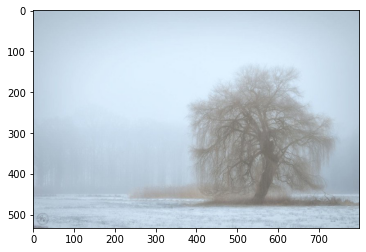

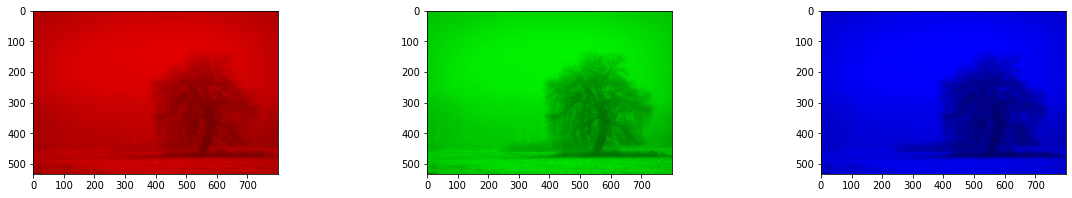

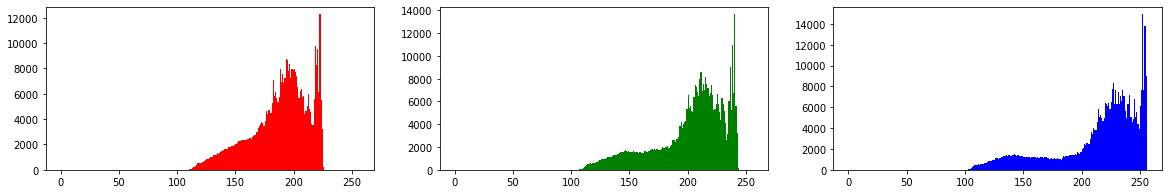

In [101]:
# Get original image
img = get_image(image)

# Show image
plot_img(img)

# Print image information
describe_img(img)

# Plot individual channels
plot_channels(img)

# Plot histogram 
plot_histo(img)

# Write to file
iio.imwrite(image+".jpg",img) 


#Normalized image
The image is normalized (histogram stretching), showing improved contrast

Image shape (height,width,channels): (533, 800, 3)
Element type: uint8
Total number of pixels: 1279200
Pixels per channel: 426400
min-max value of blue channel: 0 255
min-max value of green channel: 0 255
min-max value of red channel: 0 255


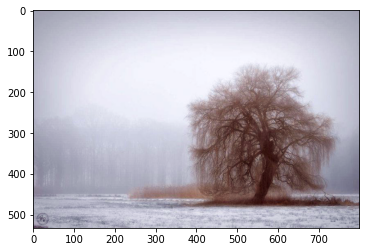

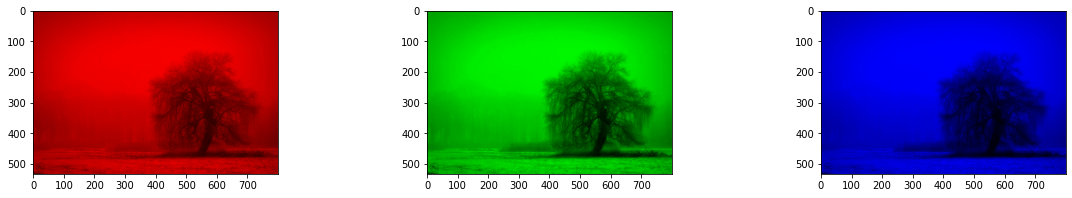

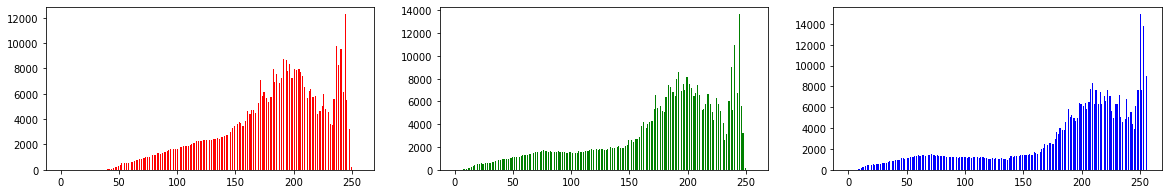

In [102]:
# Normalize image
img_norm = normalize(img)

# show result image
plot_img(img_norm)

# Print image information
describe_img(img_norm)

# Plot individual channels
plot_channels(img_norm)

# Plot histogram 
plot_histo(img_norm)

# Write to file
iio.imwrite(image+".jpg",img_norm) 